# Reading the "alto-manifest" File to Fetch Metadata of Multiple Books

In this example, we will use Pandas to read the alto-manifest file and create a dataframe, from which we can fetch metadata on all the books listed. 

Additionally, we will display the covers of each books.

## 1- Importing relevant libraries

We will import NumPy and Pandas for reading the alto-manifest file and creating the dataframe. The requests library will retrieve bibliographical metadata and image files. 

In [1]:
import numpy as np
import pandas as pd
import requests
import IPython.display as Disp
import xml.etree.ElementTree as ET
import untangle

## 2- Reading in the "alto-manifest" file

We will create a dataframe "df" which we will use to fetch bibliographical metadata.

(This notebook assumes that the file 'alto-manifest.xlsx' is in the same directory as the notebook.)

In [2]:
df = pd.read_excel('alto-manifest.xlsx', sheet_name='pyexcel_sheet1')

In [3]:
df.head()

IE PID             Call #                MMSID  Barcode  \
0  IE14126136       DSM/340.1/10  #991020315409702626   426867   
1  IE13510201        DSM/994/193  #991020322559702626   426868   
2  IE13989318  DSM/347.9423025/1  #991020314849702626   426874   
3  IE13784799   DSM/823.9/P897/1  #991020537659702626   441088   
4  IE13568896     DSM/994.602/14  #991020536689702626   441089   

                                           Image FLs  \
0  FL14126976;FL14126977;FL14126978;FL14126979;FL...   
1  FL13510529;FL13510530;FL13510531;FL13510532;FL...   
2  FL13989707;FL13989708;FL13989710;FL13989713;FL...   
3  FL13785321;FL13785329;FL13785331;FL13785333;FL...   
4  FL13569200;FL13569207;FL13569214;FL13569221;FL...   

                                            Alto FLs  
0  FL14126138;FL14126139;FL14126140;FL14126141;FL...  
1  FL13510203;FL13510204;FL13510205;FL13510206;FL...  
2  FL13989320;FL13989321;FL13989322;FL13989323;FL...  
3  FL13784801;FL13784802;FL13784803;FL13784804;FL...  
4  FL13568898;FL13568899;FL13568900;FL13568902;FL...

For ease of use, we will clean up the MMSID column and turn its values to Integer type

In [4]:
df['MMSID'] = df['MMSID'].str[1:]
df['MMSID'] = pd.to_numeric(df['MMSID'])

In [5]:
df.head() # Displaying first 5 rows

IE PID             Call #               MMSID  Barcode  \
0  IE14126136       DSM/340.1/10  991020315409702626   426867   
1  IE13510201        DSM/994/193  991020322559702626   426868   
2  IE13989318  DSM/347.9423025/1  991020314849702626   426874   
3  IE13784799   DSM/823.9/P897/1  991020537659702626   441088   
4  IE13568896     DSM/994.602/14  991020536689702626   441089   

                                           Image FLs  \
0  FL14126976;FL14126977;FL14126978;FL14126979;FL...   
1  FL13510529;FL13510530;FL13510531;FL13510532;FL...   
2  FL13989707;FL13989708;FL13989710;FL13989713;FL...   
3  FL13785321;FL13785329;FL13785331;FL13785333;FL...   
4  FL13569200;FL13569207;FL13569214;FL13569221;FL...   

                                            Alto FLs  
0  FL14126138;FL14126139;FL14126140;FL14126141;FL...  
1  FL13510203;FL13510204;FL13510205;FL13510206;FL...  
2  FL13989320;FL13989321;FL13989322;FL13989323;FL...  
3  FL13784801;FL13784802;FL13784803;FL13784804;FL...  
4  FL13568898;FL13568899;FL13568900;FL13568902;FL...

## 3- Populating a dataframe with bibliographical metadata

We will use the df dataframe to query the AlmaAPI and populate a new dataframe "bib_df" with bibliographical metadata

In [6]:
# Base URL for fetching bib data
base_url = "https://api-ap.hosted.exlibrisgroup.com/almaws/v1/bibs"

#API Key (input your own key here)
apikey = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

Here are some functions for retrieving bibliographical metadata for multiple books and consolidating it into one dataframe

In [7]:

def bibdf(mms_id,apikey):
    response = requests.get(base_url, params={'mms_id': mms_id,'apikey':apikey})
    root = ET.fromstring(response.text)
    obj = untangle.parse(response.text)
    
    # We will add tags as column names in our dataframe
    columns=[]
    for i in root[0]:
        columns.append(i.tag)
    
    biblio = pd.DataFrame(columns=columns)

    # Now we will add the attribute values for our search item into the dataframe as a row
    attribs=[]

    for v in obj.bibs.bib.children:
        attribs.append(v.cdata)

    biblio.loc[len(biblio)] = attribs 
    
    return biblio

def consolbib(MMSID, apikey):
    bib = pd.DataFrame()
    for i in MMSID:
        bib1=bibdf(i,apikey)
        bib=bib.append(bib1, ignore_index = True, sort=False) 
    return bib

    

In [8]:
# Retrieving metadata for all books in the alto-manifest file

bib_df=consolbib(df.MMSID,apikey)


In [9]:
bib_df['mms_id'] = pd.to_numeric(bib_df['mms_id']) # Formatting the mms_id column

bib_df.head() # Display first 5 rows of the metadata dataframe

mms_id record_format linked_record_id  \
0  991020315409702626        marc21                    
1  991020322559702626        marc21                    
2  991020314849702626        marc21                    
3  991020537659702626        marc21                    
4  991020536689702626        marc21                    

                                               title                  author  \
0  The theory of legal duties and rights : an int...  Hearn, William Edward,   
1                             Colonisation in 1876 /            Capricornus.   
2  The civil jurisdiction of the local courts of ...        Fenn, Charles F.   
3   Under the gum tree : Australian "bush" stories /        Praed, Campbell,   
4  Van Diemen's Land Company : (from History of V...                     NaN   

  network_numbers place_of_publication date_of_publication  \
0                          Melbourne :               1883.   
1                             Sydney :          1876-1877.   
2                           Adelaide :                1872   
3                             London :               1890.   
4                             London :               1832.   

            publisher_const holdings created_by created_date last_modified_by  \
0  John Ferres Govt Printer              import  2016-05-17Z          exl_api   
1      Turner and Henderson              import  2016-05-17Z           System   
2                        sn              import  2016-05-17Z          exl_api   
3                 Trischler              import  2016-05-17Z          exl_api   
4          British magazine              import  2016-05-17Z          exl_api   

  last_modified_date suppress_from_publishing originating_system  \
0        2019-06-29Z                    false              OTHER   
1        2019-08-01Z                    false              OTHER   
2        2019-06-28Z                    false              OTHER   
3        2019-06-18Z                    false              OTHER   
4        2019-06-12Z                    false              OTHER   

    originating_system_id cataloging_level record complete_edition  
0  b15689608-61slnsw_inst               00                     NaN  
1  b15691822-61slnsw_inst              NaN                     NaN  
2  b15689359-61slnsw_inst               00                     NaN  
3  b15751582-61slnsw_inst               00                     NaN  
4  b15751296-61slnsw_inst               00                     NaN

## 4- Displaying cover image and metadata for a specific MMS ID

Using the "df" dataframe and the "bib_df" dataframe, we will output the cover image and bibliographical metadata for specific MMS IDs.

'coverpull' is a function for pulling the cover of a specific MMS ID (from the first FL ID in the df dataframe)

In [10]:
def coverpull(df, mms_id):
    flid = df[df['MMSID']==mms_id]['Image FLs'].tolist()[0].split(';')[0]
    img_url = "http://digital.sl.nsw.gov.au/delivery/DeliveryManagerServlet"
    resp1 = requests.get(img_url,params={'dps_pid':flid, 'dps_func':'stream'})
    return resp1
    

### We set the MMS ID variable with the entry we want to look up the cover and metadata for

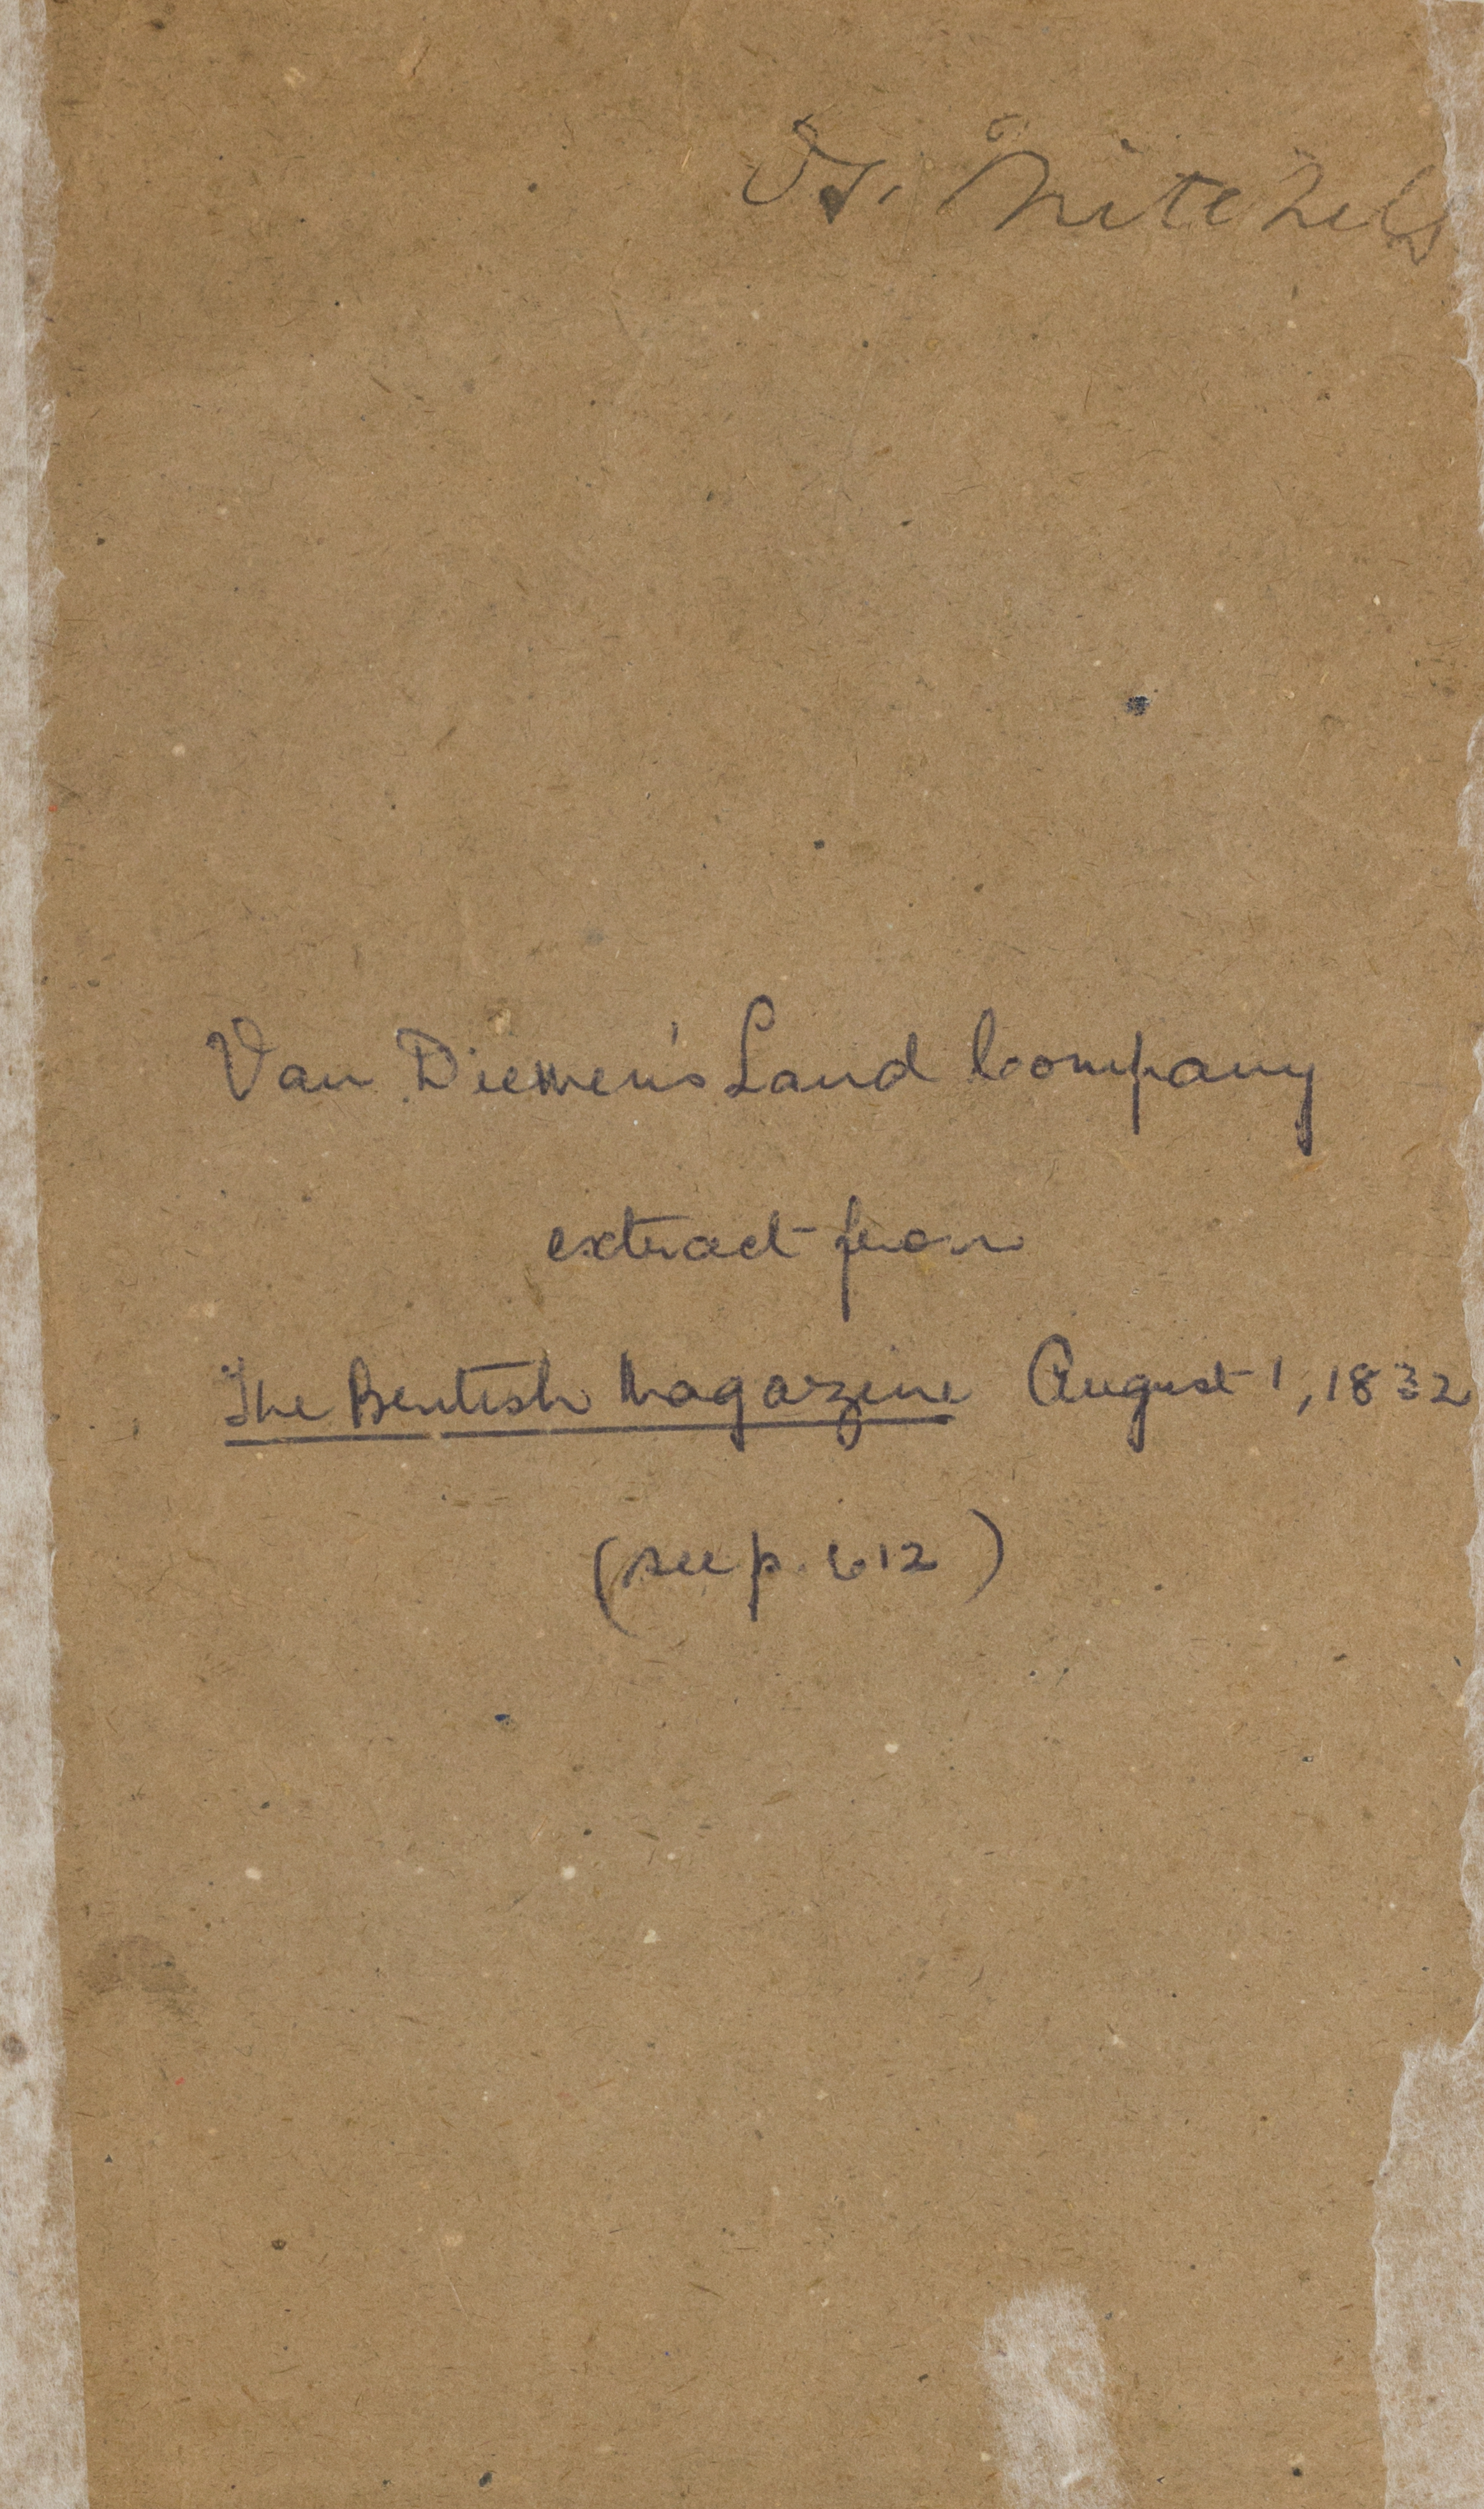

In [15]:
mms_id = 991020536689702626

resp=coverpull(df, mms_id)

meta=bib_df[bib_df['mms_id']==mms_id]

Disp.display(Disp.HTML(meta.to_html()))
Disp.Image(data=resp.content,width=500)